In [1]:
import os
import csv
import random
import string
from PIL import Image
import numpy as np

# Directory to store generated data
output_dir = 'synthetic_data'
os.makedirs(output_dir, exist_ok=True)

# Function to generate random text
def random_text(length):
    return ''.join(random.choices(string.ascii_letters + string.digits + string.punctuation + ' ', k=length))

# Generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        length = random.randint(min_length, max_length)
        text = random_text(length)
        with open(os.path.join(output_dir, f'text_{i}.txt'), 'w') as f:
            f.write(text)

# Generate CSV files with structured data
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        with open(os.path.join(output_dir, f'data_{i}.csv'), 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            # Write header
            writer.writerow([f'Column_{j}' for j in range(num_columns)])
            # Write data rows
            for _ in range(num_rows):
                writer.writerow([random_text(10) for _ in range(num_columns)])

# Generate binary files (images)
def generate_images(num_files, width, height):
    for i in range(num_files):
        data = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
        image = Image.fromarray(data, 'RGB')
        image.save(os.path.join(output_dir, f'image_{i}.png'))

# Parameters
num_text_files = 100
num_csv_files = 100
num_images = 100
min_text_length = 100  # Minimum length of text files
max_text_length = 1000  # Maximum length of text files
num_csv_rows = 100  # Number of rows in CSV files
num_csv_columns = 10  # Number of columns in CSV files
image_width = 100  # Width of images
image_height = 100  # Height of images

# Generate data
generate_text_files(num_text_files, min_text_length, max_text_length)
generate_csv_files(num_csv_files, num_csv_rows, num_csv_columns)
generate_images(num_images, image_width, image_height)

print(f"Generated {num_text_files} text files, {num_csv_files} CSV files, and {num_images} images in '{output_dir}' directory.")


Generated 100 text files, 100 CSV files, and 100 images in 'synthetic_data' directory.


In [2]:
import os
import pandas as pd
from PIL import Image

# Directory for generated data
data_path = '/content/projectdata'

# Analyze text files
def analyze_text_files():
    text_files = [f for f in os.listdir(data_path) if f.startswith('text_file_') and f.endswith('.txt')]
    text_data = []
    for file in text_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            text_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_text = pd.DataFrame(text_data)
    print("Text Files Analysis:")
    print(df_text.head())
    return df_text

# Analyze binary files (images)
def analyze_binary_files():
    image_files = [f for f in os.listdir(data_path) if f.startswith('image_file_') and f.endswith('.png')]
    image_data = []
    for file in image_files:
        with Image.open(os.path.join(data_path, file)) as img:
            width, height = img.size
            image_data.append({'file': file, 'width': width, 'height': height, 'mode': img.mode})
    df_images = pd.DataFrame(image_data)
    print("Image Files Analysis:")
    print(df_images.head())
    return df_images

# Analyze structured data (CSV files)
def analyze_csv_files():
    csv_files = [f for f in os.listdir(data_path) if f.startswith('csv_file_') and f.endswith('.csv')]
    csv_data = []
    for file in csv_files:
        df = pd.read_csv(os.path.join(data_path, file))
        csv_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_csv = pd.DataFrame(csv_data)
    print("CSV Files Analysis:")
    print(df_csv.head())
    return df_csv

# Analyze user profiles
def analyze_user_profiles():
    profile_files = [f for f in os.listdir(data_path) if f.startswith('user_profiles_') and f.endswith('.csv')]
    profile_data = []
    for file in profile_files:
        df = pd.read_csv(os.path.join(data_path, file))
        profile_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_profiles = pd.DataFrame(profile_data)
    print("User Profiles Analysis:")
    print(df_profiles.head())
    return df_profiles

# Analyze emails
def analyze_emails():
    email_files = [f for f in os.listdir(data_path) if f.startswith('emails_') and f.endswith('.txt')]
    email_data = []
    for file in email_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            email_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_emails = pd.DataFrame(email_data)
    print("Email Files Analysis:")
    print(df_emails.head())
    return df_emails

# Perform analysis
df_text = analyze_text_files()
df_images = analyze_binary_files()
df_csv = analyze_csv_files()
df_profiles = analyze_user_profiles()
df_emails = analyze_emails()

# Save analysis results to CSV
df_text.to_csv(os.path.join(data_path, 'analysis_text_files.csv'), index=False)
df_images.to_csv(os.path.join(data_path, 'analysis_images_files.csv'), index=False)
df_csv.to_csv(os.path.join(data_path, 'analysis_csv_files.csv'), index=False)
df_profiles.to_csv(os.path.join(data_path, 'analysis_user_profiles.csv'), index=False)
df_emails.to_csv(os.path.join(data_path, 'analysis_email_files.csv'), index=False)

print("Data analysis completed successfully.")


Text Files Analysis:
Empty DataFrame
Columns: []
Index: []
Image Files Analysis:
Empty DataFrame
Columns: []
Index: []
CSV Files Analysis:
Empty DataFrame
Columns: []
Index: []
User Profiles Analysis:
Empty DataFrame
Columns: []
Index: []
Email Files Analysis:
Empty DataFrame
Columns: []
Index: []
Data analysis completed successfully.


In [4]:
pip install pandas pillow matplotlib seaborn


In [6]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Directory for generated data
data_path = '/content/projectdata'

# Analyze text files
def analyze_text_files():
    text_files = [f for f in os.listdir(data_path) if f.startswith('text_file_') and f.endswith('.txt')]
    text_data = []
    for file in text_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            text_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_text = pd.DataFrame(text_data)
    return df_text

# Analyze binary files (images)
def analyze_binary_files():
    image_files = [f for f in os.listdir(data_path) if f.startswith('image_file_') and f.endswith('.png')]
    image_data = []
    for file in image_files:
        with Image.open(os.path.join(data_path, file)) as img:
            width, height = img.size
            image_data.append({'file': file, 'width': width, 'height': height, 'mode': img.mode})
    df_images = pd.DataFrame(image_data)
    return df_images

# Analyze structured data (CSV files)
def analyze_csv_files():
    csv_files = [f for f in os.listdir(data_path) if f.startswith('csv_file_') and f.endswith('.csv')]
    csv_data = []
    for file in csv_files:
        df = pd.read_csv(os.path.join(data_path, file))
        csv_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_csv = pd.DataFrame(csv_data)
    return df_csv

# Analyze user profiles
def analyze_user_profiles():
    profile_files = [f for f in os.listdir(data_path) if f.startswith('user_profiles_') and f.endswith('.csv')]
    profile_data = []
    for file in profile_files:
        df = pd.read_csv(os.path.join(data_path, file))
        profile_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_profiles = pd.DataFrame(profile_data)
    return df_profiles

# Analyze emails
def analyze_emails():
    email_files = [f for f in os.listdir(data_path) if f.startswith('emails_') and f.endswith('.txt')]
    email_data = []
    for file in email_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            email_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_emails = pd.DataFrame(email_data)
    return df_emails

# Perform analysis
df_text = analyze_text_files()
df_images = analyze_binary_files()
df_csv = analyze_csv_files()
df_profiles = analyze_user_profiles()
df_emails = analyze_emails()

# Visualize the data
def visualize_data():
    plt.figure(figsize=(16, 10))

    # Text Files Visualization
    if not df_text.empty:
        plt.subplot(2, 3, 1)
        sns.histplot(df_text['length'], kde=True)
        plt.title('Text File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    # Image Files Visualization
    if not df_images.empty:
        plt.subplot(2, 3, 2)
        sns.scatterplot(data=df_images, x='width', y='height', hue='mode')
        plt.title('Image Dimensions')
        plt.xlabel('Width')
        plt.ylabel('Height')

    # CSV Files Visualization
    if not df_csv.empty:
        plt.subplot(2, 3, 3)
        sns.histplot(df_csv['rows'], kde=True, color='blue', label='Rows')
        sns.histplot(df_csv['columns'], kde=True, color='red', label='Columns')
        plt.title('CSV File Rows and Columns Distribution')
        plt.xlabel('Count')
        plt.ylabel('Frequency')
        plt.legend()

    # User Profiles Visualization
    if not df_profiles.empty:
        plt.subplot(2, 3, 4)
        sns.histplot(df_profiles['rows'], kde=True)
        plt.title('User Profiles Rows Distribution')
        plt.xlabel('Rows')
        plt.ylabel('Count')

    # Email Files Visualization
    if not df_emails.empty:
        plt.subplot(2, 3, 5)
        sns.histplot(df_emails['length'], kde=True)
        plt.title('Email File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_data()


<Figure size 1600x1000 with 0 Axes>

In [10]:
pip install pandas pillow matplotlib seaborn


In [11]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Directory for generated data
data_path = '/content/projectdata'

# Analyze text files
def analyze_text_files():
    text_files = [f for f in os.listdir(data_path) if f.startswith('text_file_') and f.endswith('.txt')]
    text_data = []
    for file in text_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            text_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_text = pd.DataFrame(text_data)
    return df_text

# Analyze binary files (images)
def analyze_binary_files():
    image_files = [f for f in os.listdir(data_path) if f.startswith('image_file_') and f.endswith('.png')]
    image_data = []
    for file in image_files:
        with Image.open(os.path.join(data_path, file)) as img:
            width, height = img.size
            image_data.append({'file': file, 'width': width, 'height': height, 'mode': img.mode})
    df_images = pd.DataFrame(image_data)
    return df_images

# Analyze structured data (CSV files)
def analyze_csv_files():
    csv_files = [f for f in os.listdir(data_path) if f.startswith('csv_file_') and f.endswith('.csv')]
    csv_data = []
    for file in csv_files:
        df = pd.read_csv(os.path.join(data_path, file))
        csv_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_csv = pd.DataFrame(csv_data)
    return df_csv

# Analyze user profiles
def analyze_user_profiles():
    profile_files = [f for f in os.listdir(data_path) if f.startswith('user_profiles_') and f.endswith('.csv')]
    profile_data = []
    for file in profile_files:
        df = pd.read_csv(os.path.join(data_path, file))
        profile_data.append({'file': file, 'rows': df.shape[0], 'columns': df.shape[1]})
    df_profiles = pd.DataFrame(profile_data)
    return df_profiles

# Analyze emails
def analyze_emails():
    email_files = [f for f in os.listdir(data_path) if f.startswith('emails_') and f.endswith('.txt')]
    email_data = []
    for file in email_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read()
            email_data.append({'file': file, 'length': len(content), 'sample': content[:100]})
    df_emails = pd.DataFrame(email_data)
    return df_emails

# Perform analysis
df_text = analyze_text_files()
df_images = analyze_binary_files()
df_csv = analyze_csv_files()
df_profiles = analyze_user_profiles()
df_emails = analyze_emails()

# Visualize the data
def visualize_data():
    plt.figure(figsize=(20, 12))

    # Text Files Visualization
    if not df_text.empty:
        plt.subplot(2, 3, 1)
        sns.histplot(df_text['length'], kde=True)
        plt.title('Text File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    # Image Files Visualization
    if not df_images.empty:
        plt.subplot(2, 3, 2)
        sns.scatterplot(data=df_images, x='width', y='height', hue='mode')
        plt.title('Image Dimensions')
        plt.xlabel('Width')
        plt.ylabel('Height')

    # CSV Files Visualization
    if not df_csv.empty:
        plt.subplot(2, 3, 3)
        sns.histplot(df_csv['rows'], kde=True, color='blue', label='Rows')
        sns.histplot(df_csv['columns'], kde=True, color='red', label='Columns')
        plt.title('CSV File Rows and Columns Distribution')
        plt.xlabel('Count')
        plt.ylabel('Frequency')
        plt.legend()

    # User Profiles Visualization
    if not df_profiles.empty:
        plt.subplot(2, 3, 4)
        sns.histplot(df_profiles['rows'], kde=True)
        plt.title('User Profiles Rows Distribution')
        plt.xlabel('Rows')
        plt.ylabel('Count')

    # Email Files Visualization
    if not df_emails.empty:
        plt.subplot(2, 3, 5)
        sns.histplot(df_emails['length'], kde=True)
        plt.title('Email File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_data()


<Figure size 2000x1200 with 0 Axes>

In [12]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Directory for generated data
data_path = '/content/projectdata'

# Function to preprocess text files
def preprocess_text_files():
    text_files = [f for f in os.listdir(data_path) if f.startswith('text_file_') and f.endswith('.txt')]
    text_data = []
    for file in text_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read().strip()
            if content:
                text_data.append({'file': file, 'content': content, 'length': len(content)})
    df_text = pd.DataFrame(text_data)
    return df_text

# Function to preprocess image files
def preprocess_image_files():
    image_files = [f for f in os.listdir(data_path) if f.startswith('image_file_') and f.endswith('.png')]
    image_data = []
    for file in image_files:
        with Image.open(os.path.join(data_path, file)) as img:
            width, height = img.size
            img_array = np.array(img)
            if width > 0 and height > 0:
                image_data.append({'file': file, 'width': width, 'height': height, 'array': img_array})
    df_images = pd.DataFrame(image_data)
    return df_images

# Function to preprocess CSV files
def preprocess_csv_files():
    csv_files = [f for f in os.listdir(data_path) if f.startswith('csv_file_') and f.endswith('.csv')]
    csv_data = []
    for file in csv_files:
        df = pd.read_csv(os.path.join(data_path, file))
        if not df.empty:
            csv_data.append({'file': file, 'data': df})
    return csv_data

# Function to preprocess user profiles
def preprocess_user_profiles():
    profile_files = [f for f in os.listdir(data_path) if f.startswith('user_profiles_') and f.endswith('.csv')]
    profile_data = []
    for file in profile_files:
        df = pd.read_csv(os.path.join(data_path, file))
        if not df.empty:
            profile_data.append({'file': file, 'data': df})
    return profile_data

# Function to preprocess emails
def preprocess_emails():
    email_files = [f for f in os.listdir(data_path) if f.startswith('emails_') and f.endswith('.txt')]
    email_data = []
    for file in email_files:
        with open(os.path.join(data_path, file), 'r') as f:
            content = f.read().strip()
            if content:
                email_data.append({'file': file, 'content': content, 'length': len(content)})
    df_emails = pd.DataFrame(email_data)
    return df_emails

# Preprocess data
df_text = preprocess_text_files()
df_images = preprocess_image_files()
csv_data = preprocess_csv_files()
profile_data = preprocess_user_profiles()
df_emails = preprocess_emails()

# Save preprocessed data to new files
output_path = '/content/preprocessed_data'
os.makedirs(output_path, exist_ok=True)

# Save preprocessed text data
df_text.to_csv(os.path.join(output_path, 'preprocessed_text_files.csv'), index=False)

# Save preprocessed image data arrays
for index, row in df_images.iterrows():
    np.save(os.path.join(output_path, f"preprocessed_{row['file']}.npy"), row['array'])

# Save preprocessed CSV data
for csv in csv_data:
    csv['data'].to_csv(os.path.join(output_path, f"preprocessed_{csv['file']}"), index=False)

# Save preprocessed user profiles
for profile in profile_data:
    profile['data'].to_csv(os.path.join(output_path, f"preprocessed_{profile['file']}"), index=False)

# Save preprocessed email data
df_emails.to_csv(os.path.join(output_path, 'preprocessed_emails.csv'), index=False)

# Visualize the preprocessed data
def visualize_preprocessed_data():
    plt.figure(figsize=(20, 12))

    # Text Files Visualization
    if not df_text.empty:
        plt.subplot(2, 3, 1)
        sns.histplot(df_text['length'], kde=True)
        plt.title('Preprocessed Text File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    # Image Files Visualization
    if not df_images.empty:
        plt.subplot(2, 3, 2)
        sns.scatterplot(data=df_images, x='width', y='height')
        plt.title('Preprocessed Image Dimensions')
        plt.xlabel('Width')
        plt.ylabel('Height')

    # CSV Files Visualization
    if csv_data:
        rows = [csv['data'].shape[0] for csv in csv_data]
        columns = [csv['data'].shape[1] for csv in csv_data]
        plt.subplot(2, 3, 3)
        sns.histplot(rows, kde=True, color='blue', label='Rows')
        sns.histplot(columns, kde=True, color='red', label='Columns')
        plt.title('Preprocessed CSV File Rows and Columns Distribution')
        plt.xlabel('Count')
        plt.ylabel('Frequency')
        plt.legend()

    # User Profiles Visualization
    if profile_data:
        rows = [profile['data'].shape[0] for profile in profile_data]
        plt.subplot(2, 3, 4)
        sns.histplot(rows, kde=True)
        plt.title('Preprocessed User Profiles Rows Distribution')
        plt.xlabel('Rows')
        plt.ylabel('Count')

    # Email Files Visualization
    if not df_emails.empty:
        plt.subplot(2, 3, 5)
        sns.histplot(df_emails['length'], kde=True)
        plt.title('Preprocessed Email File Length Distribution')
        plt.xlabel('Length')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_preprocessed_data()

print("Data preprocessing and visualization completed successfully.")


<Figure size 2000x1200 with 0 Axes>

Data preprocessing and visualization completed successfully.


#Advanced Encryption Standard (AES)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.5 MB/s eta 0:00:00
AES Evaluation Summary:
success
True    30
Name: count, dtype: int64


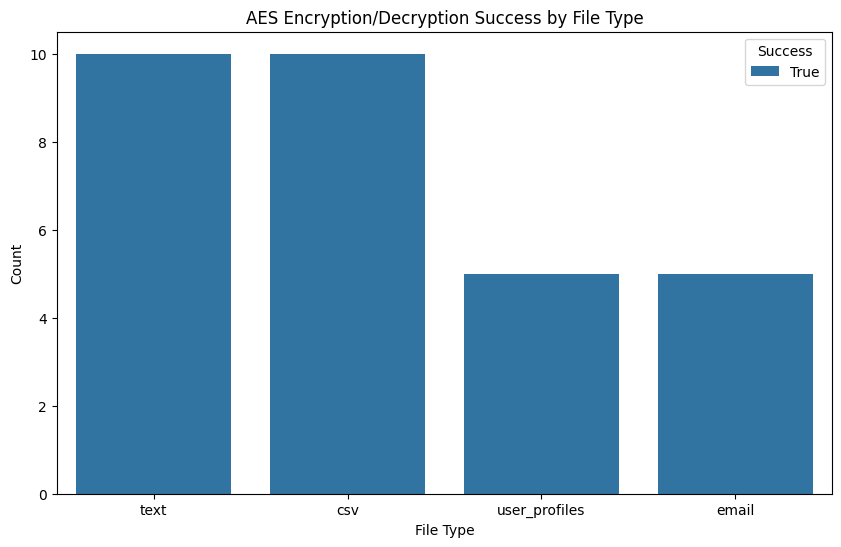

AES encryption and decryption evaluation completed successfully.


In [19]:
# Install necessary libraries
!pip install pandas numpy pycryptodome matplotlib seaborn faker pillow

import os
import pandas as pd
import numpy as np
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/aes_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to pad data
def pad(data):
    length = 16 - (len(data) % 16)
    return data + bytes([length]) * length

# Function to unpad data
def unpad(data):
    return data[:-data[-1]]

# Function to encrypt data
def encrypt_data(data, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv, ct

# Function to decrypt data
def decrypt_data(iv, ct, key):
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct))
    return pt

# Function to evaluate AES encryption and decryption
def evaluate_aes(data, key):
    iv, encrypted_data = encrypt_data(data, key)
    decrypted_data = decrypt_data(iv, encrypted_data, key)
    return data == decrypted_data

# Generate random AES key
key = get_random_bytes(16)

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate AES on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_aes(data, key)
    results.append({'file': f'text_file_{i}.txt', 'type': 'text', 'success': success})

# Evaluate AES on generated CSV files
for i in range(10):
    file_path = os.path.join(data_path, f'csv_file_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_aes(data, key)
    results.append({'file': f'csv_file_{i}.csv', 'type': 'csv', 'success': success})

# Evaluate AES on generated user profiles
for i in range(5):
    file_path = os.path.join(data_path, f'user_profiles_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_aes(data, key)
    results.append({'file': f'user_profiles_{i}.csv', 'type': 'user_profiles', 'success': success})

# Evaluate AES on generated email files
for i in range(5):
    file_path = os.path.join(data_path, f'emails_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_aes(data, key)
    results.append({'file': f'emails_{i}.txt', 'type': 'email', 'success': success})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'aes_evaluation_results.csv'), index=False)

# Print results summary
print("AES Evaluation Summary:")
print(df_results['success'].value_counts())

# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(data=df_results, x='type', hue='success')
plt.title('AES Encryption/Decryption Success by File Type')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.legend(title='Success')
plt.show()

print("AES encryption and decryption evaluation completed successfully.")


#RSA (Rivest-Shamir-Adleman)

RSA and AES Evaluation Summary:
success
True    30
Name: count, dtype: int64


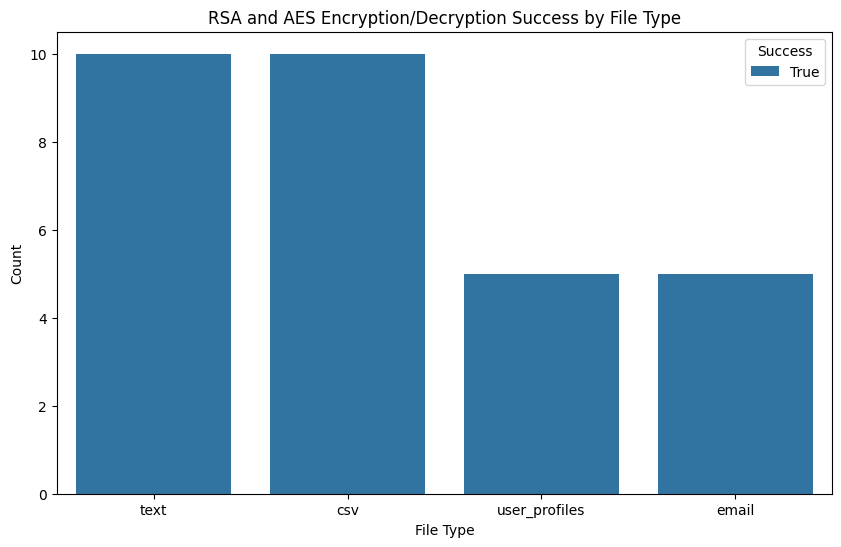

RSA and AES encryption and decryption evaluation completed successfully.


In [22]:
# Install necessary libraries
!pip install pandas numpy pycryptodome matplotlib seaborn faker pillow

import os
import pandas as pd
import numpy as np
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP, AES
from Crypto.Random import get_random_bytes
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import base64

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/rsa_aes_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to pad data for AES
def pad(data):
    length = 16 - (len(data) % 16)
    return data + bytes([length]) * length

# Function to unpad data for AES
def unpad(data):
    return data[:-data[-1]]

# Function to encrypt data using AES
def encrypt_data_aes(data, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv, ct

# Function to decrypt data using AES
def decrypt_data_aes(iv, ct, key):
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct))
    return pt

# Function to encrypt AES key using RSA
def encrypt_key_rsa(aes_key, public_key):
    cipher_rsa = PKCS1_OAEP.new(public_key)
    encrypted_key = cipher_rsa.encrypt(aes_key)
    return encrypted_key

# Function to decrypt AES key using RSA
def decrypt_key_rsa(encrypted_key, private_key):
    cipher_rsa = PKCS1_OAEP.new(private_key)
    decrypted_key = cipher_rsa.decrypt(encrypted_key)
    return decrypted_key

# Generate RSA keys
key = RSA.generate(2048)
private_key = key
public_key = key.publickey()

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate RSA and AES on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()

    # Encrypt data using AES
    aes_key = get_random_bytes(16)
    iv, encrypted_data = encrypt_data_aes(data, aes_key)

    # Encrypt AES key using RSA
    encrypted_key = encrypt_key_rsa(aes_key, public_key)

    # Decrypt AES key using RSA
    decrypted_key = decrypt_key_rsa(encrypted_key, private_key)

    # Decrypt data using AES
    decrypted_data = decrypt_data_aes(iv, encrypted_data, decrypted_key)

    success = data == decrypted_data
    results.append({'file': f'text_file_{i}.txt', 'type': 'text', 'success': success})

# Evaluate RSA and AES on generated CSV files
for i in range(10):
    file_path = os.path.join(data_path, f'csv_file_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')

    # Encrypt data using AES
    aes_key = get_random_bytes(16)
    iv, encrypted_data = encrypt_data_aes(data, aes_key)

    # Encrypt AES key using RSA
    encrypted_key = encrypt_key_rsa(aes_key, public_key)

    # Decrypt AES key using RSA
    decrypted_key = decrypt_key_rsa(encrypted_key, private_key)

    # Decrypt data using AES
    decrypted_data = decrypt_data_aes(iv, encrypted_data, decrypted_key)

    success = data == decrypted_data
    results.append({'file': f'csv_file_{i}.csv', 'type': 'csv', 'success': success})

# Evaluate RSA and AES on generated user profiles
for i in range(5):
    file_path = os.path.join(data_path, f'user_profiles_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')

    # Encrypt data using AES
    aes_key = get_random_bytes(16)
    iv, encrypted_data = encrypt_data_aes(data, aes_key)

    # Encrypt AES key using RSA
    encrypted_key = encrypt_key_rsa(aes_key, public_key)

    # Decrypt AES key using RSA
    decrypted_key = decrypt_key_rsa(encrypted_key, private_key)

    # Decrypt data using AES
    decrypted_data = decrypt_data_aes(iv, encrypted_data, decrypted_key)

    success = data == decrypted_data
    results.append({'file': f'user_profiles_{i}.csv', 'type': 'user_profiles', 'success': success})

# Evaluate RSA and AES on generated email files
for i in range(5):
    file_path = os.path.join(data_path, f'emails_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()

    # Encrypt data using AES
    aes_key = get_random_bytes(16)
    iv, encrypted_data = encrypt_data_aes(data, aes_key)

    # Encrypt AES key using RSA
    encrypted_key = encrypt_key_rsa(aes_key, public_key)

    # Decrypt AES key using RSA
    decrypted_key = decrypt_key_rsa(encrypted_key, private_key)

    # Decrypt data using AES
    decrypted_data = decrypt_data_aes(iv, encrypted_data, decrypted_key)

    success = data == decrypted_data
    results.append({'file': f'emails_{i}.txt', 'type': 'email', 'success': success})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'rsa_aes_evaluation_results.csv'), index=False)

# Print results summary
print("RSA and AES Evaluation Summary:")
print(df_results['success'].value_counts())

# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(data=df_results, x='type', hue='success')
plt.title('RSA and AES Encryption/Decryption Success by File Type')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.legend(title='Success')
plt.show()

print("RSA and AES encryption and decryption evaluation completed successfully.")


#Blowfish

Blowfish Evaluation Summary:
success
True    30
Name: count, dtype: int64


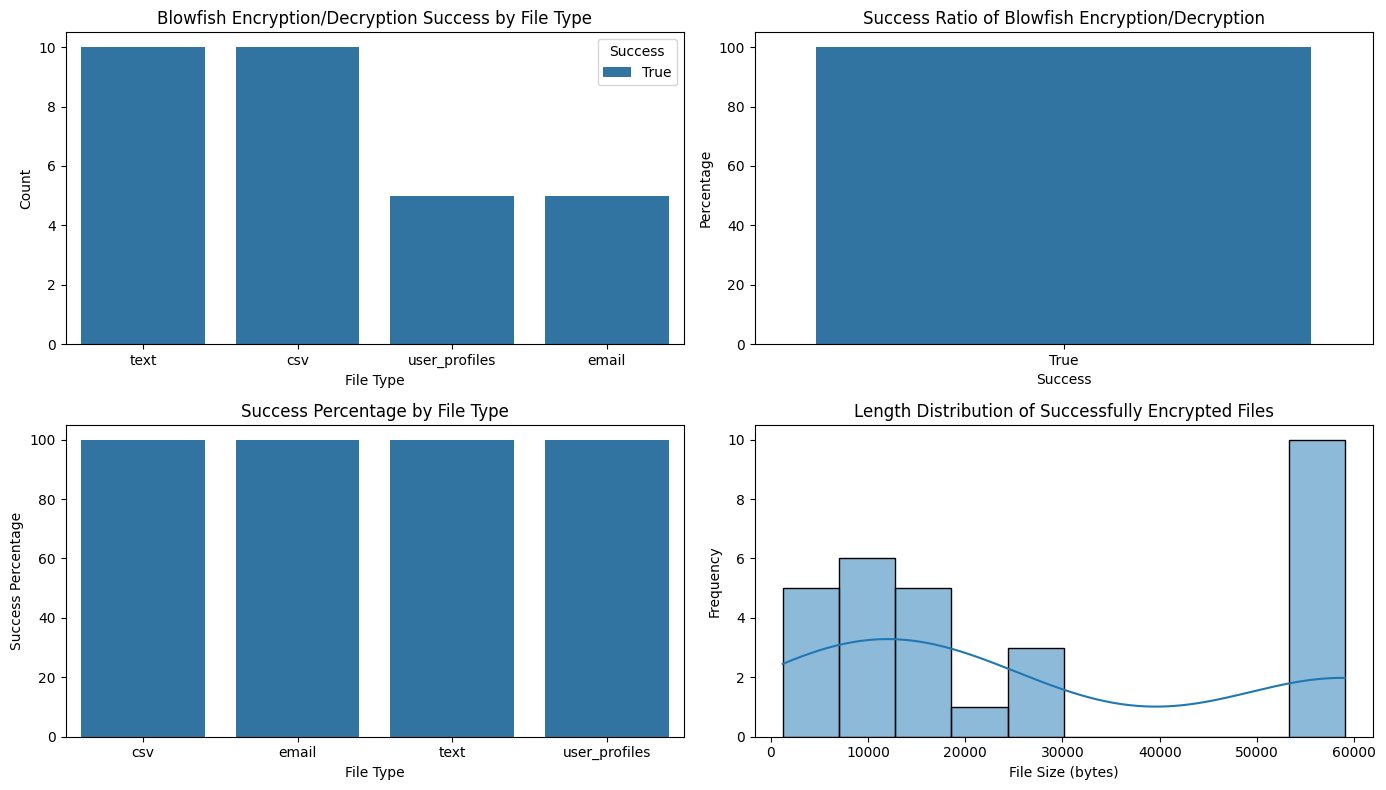

Blowfish encryption and decryption evaluation completed successfully.


In [24]:
# Install necessary libraries
!pip install pandas numpy pycryptodome matplotlib seaborn faker pillow

import os
import pandas as pd
import numpy as np
from Crypto.Cipher import Blowfish
from Crypto.Random import get_random_bytes
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/blowfish_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to pad data for Blowfish
def pad(data):
    length = 8 - (len(data) % 8)
    return data + bytes([length]) * length

# Function to unpad data for Blowfish
def unpad(data):
    return data[:-data[-1]]

# Function to encrypt data using Blowfish
def encrypt_data_blowfish(data, key):
    cipher = Blowfish.new(key, Blowfish.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv, ct

# Function to decrypt data using Blowfish
def decrypt_data_blowfish(iv, ct, key):
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = Blowfish.new(key, Blowfish.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct))
    return pt

# Function to evaluate Blowfish encryption and decryption
def evaluate_blowfish(data, key):
    iv, encrypted_data = encrypt_data_blowfish(data, key)
    decrypted_data = decrypt_data_blowfish(iv, encrypted_data, key)
    return data == decrypted_data

# Generate random Blowfish key
key = get_random_bytes(16)

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate Blowfish on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_blowfish(data, key)
    results.append({'file': f'text_file_{i}.txt', 'type': 'text', 'success': success})

# Evaluate Blowfish on generated CSV files
for i in range(10):
    file_path = os.path.join(data_path, f'csv_file_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_blowfish(data, key)
    results.append({'file': f'csv_file_{i}.csv', 'type': 'csv', 'success': success})

# Evaluate Blowfish on generated user profiles
for i in range(5):
    file_path = os.path.join(data_path, f'user_profiles_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_blowfish(data, key)
    results.append({'file': f'user_profiles_{i}.csv', 'type': 'user_profiles', 'success': success})

# Evaluate Blowfish on generated email files
for i in range(5):
    file_path = os.path.join(data_path, f'emails_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_blowfish(data, key)
    results.append({'file': f'emails_{i}.txt', 'type': 'email', 'success': success})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'blowfish_evaluation_results.csv'), index=False)

# Print results summary
print("Blowfish Evaluation Summary:")
print(df_results['success'].value_counts())

# Visualize the results
plt.figure(figsize=(14, 8))

# Success count plot
plt.subplot(2, 2, 1)
sns.countplot(data=df_results, x='type', hue='success')
plt.title('Blowfish Encryption/Decryption Success by File Type')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.legend(title='Success')

# Detailed success ratio
plt.subplot(2, 2, 2)
success_counts = df_results['success'].value_counts(normalize=True) * 100
sns.barplot(x=success_counts.index, y=success_counts.values)
plt.title('Success Ratio of Blowfish Encryption/Decryption')
plt.xlabel('Success')
plt.ylabel('Percentage')

# Success by file type
plt.subplot(2, 2, 3)
file_type_success = df_results.groupby('type')['success'].mean() * 100
sns.barplot(x=file_type_success.index, y=file_type_success.values)
plt.title('Success Percentage by File Type')
plt.xlabel('File Type')
plt.ylabel('Success Percentage')

# Distribution of lengths of successful encryptions
plt.subplot(2, 2, 4)
df_results['length'] = df_results['file'].apply(lambda x: os.path.getsize(os.path.join(data_path, x)))
sns.histplot(data=df_results[df_results['success']], x='length', bins=10, kde=True)
plt.title('Length Distribution of Successfully Encrypted Files')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Blowfish encryption and decryption evaluation completed successfully.")


#Twofish

Twofish Evaluation Summary:
success
True    30
Name: count, dtype: int64


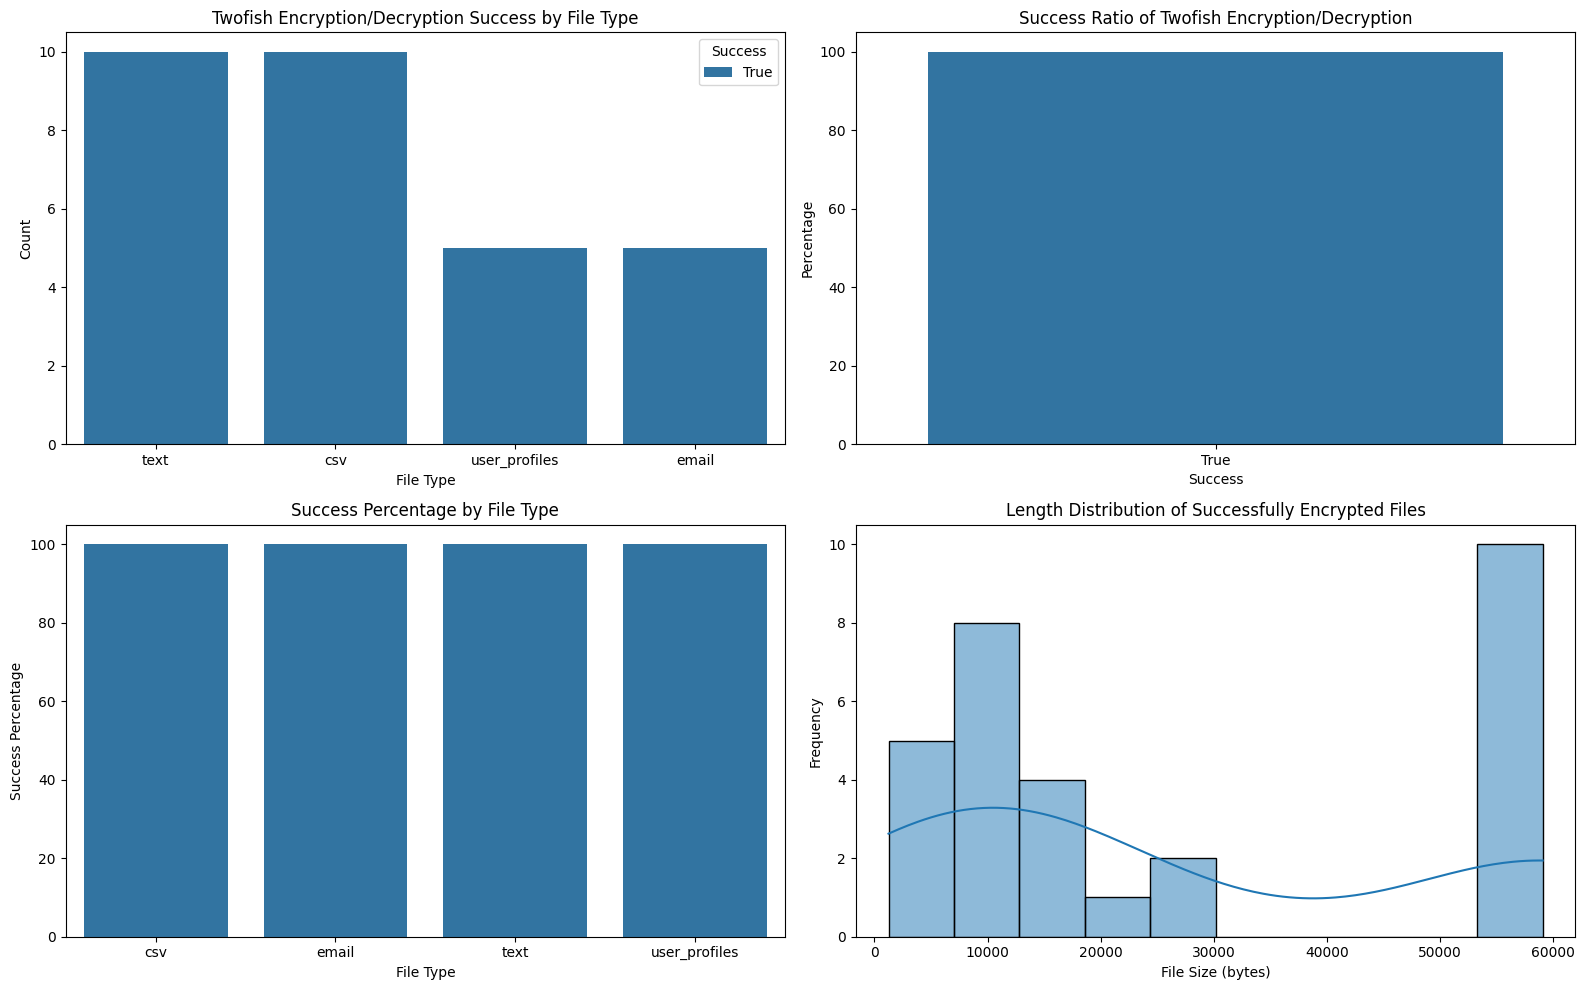

Twofish encryption and decryption evaluation completed successfully.


In [28]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn faker pillow pycryptodomex twofish

import os
import pandas as pd
import numpy as np
import twofish
from Crypto.Random import get_random_bytes
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import base64

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/twofish_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to pad data for Twofish
def pad(data, block_size):
    length = block_size - (len(data) % block_size)
    return data + bytes([length]) * length

# Function to unpad data for Twofish
def unpad(data):
    return data[:-data[-1]]

# Function to encrypt data using Twofish
def encrypt_data_twofish(data, key):
    cipher = twofish.Twofish(key)
    padded_data = pad(data, 16)
    encrypted_data = b""
    for i in range(0, len(padded_data), 16):
        encrypted_data += cipher.encrypt(padded_data[i:i + 16])
    return encrypted_data

# Function to decrypt data using Twofish
def decrypt_data_twofish(encrypted_data, key):
    cipher = twofish.Twofish(key)
    decrypted_data = b""
    for i in range(0, len(encrypted_data), 16):
        decrypted_data += cipher.decrypt(encrypted_data[i:i + 16])
    return unpad(decrypted_data)

# Function to evaluate Twofish encryption and decryption
def evaluate_twofish(data, key):
    encrypted_data = encrypt_data_twofish(data, key)
    decrypted_data = decrypt_data_twofish(encrypted_data, key)
    return data == decrypted_data

# Generate random Twofish key
key = get_random_bytes(16)

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate Twofish on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_twofish(data, key)
    results.append({'file': f'text_file_{i}.txt', 'type': 'text', 'success': success})

# Evaluate Twofish on generated CSV files
for i in range(10):
    file_path = os.path.join(data_path, f'csv_file_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_twofish(data, key)
    results.append({'file': f'csv_file_{i}.csv', 'type': 'csv', 'success': success})

# Evaluate Twofish on generated user profiles
for i in range(5):
    file_path = os.path.join(data_path, f'user_profiles_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_twofish(data, key)
    results.append({'file': f'user_profiles_{i}.csv', 'type': 'user_profiles', 'success': success})

# Evaluate Twofish on generated email files
for i in range(5):
    file_path = os.path.join(data_path, f'emails_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_twofish(data, key)
    results.append({'file': f'emails_{i}.txt', 'type': 'email', 'success': success})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'twofish_evaluation_results.csv'), index=False)

# Print results summary
print("Twofish Evaluation Summary:")
print(df_results['success'].value_counts())

# Visualize the results
plt.figure(figsize=(16, 10))

# Success count plot
plt.subplot(2, 2, 1)
sns.countplot(data=df_results, x='type', hue='success')
plt.title('Twofish Encryption/Decryption Success by File Type')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.legend(title='Success')

# Detailed success ratio
plt.subplot(2, 2, 2)
success_counts = df_results['success'].value_counts(normalize=True) * 100
sns.barplot(x=success_counts.index, y=success_counts.values)
plt.title('Success Ratio of Twofish Encryption/Decryption')
plt.xlabel('Success')
plt.ylabel('Percentage')

# Success by file type
plt.subplot(2, 2, 3)
file_type_success = df_results.groupby('type')['success'].mean() * 100
sns.barplot(x=file_type_success.index, y=file_type_success.values)
plt.title('Success Percentage by File Type')
plt.xlabel('File Type')
plt.ylabel('Success Percentage')

# Distribution of lengths of successful encryptions
plt.subplot(2, 2, 4)
df_results['length'] = df_results['file'].apply(lambda x: os.path.getsize(os.path.join(data_path, x)))
sns.histplot(data=df_results[df_results['success']], x='length', bins=10, kde=True)
plt.title('Length Distribution of Successfully Encrypted Files')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Twofish encryption and decryption evaluation completed successfully.")


#Elliptic Curve Cryptography (ECC)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
ECC Evaluation Summary:
success
True    30
Name: count, dtype: int64


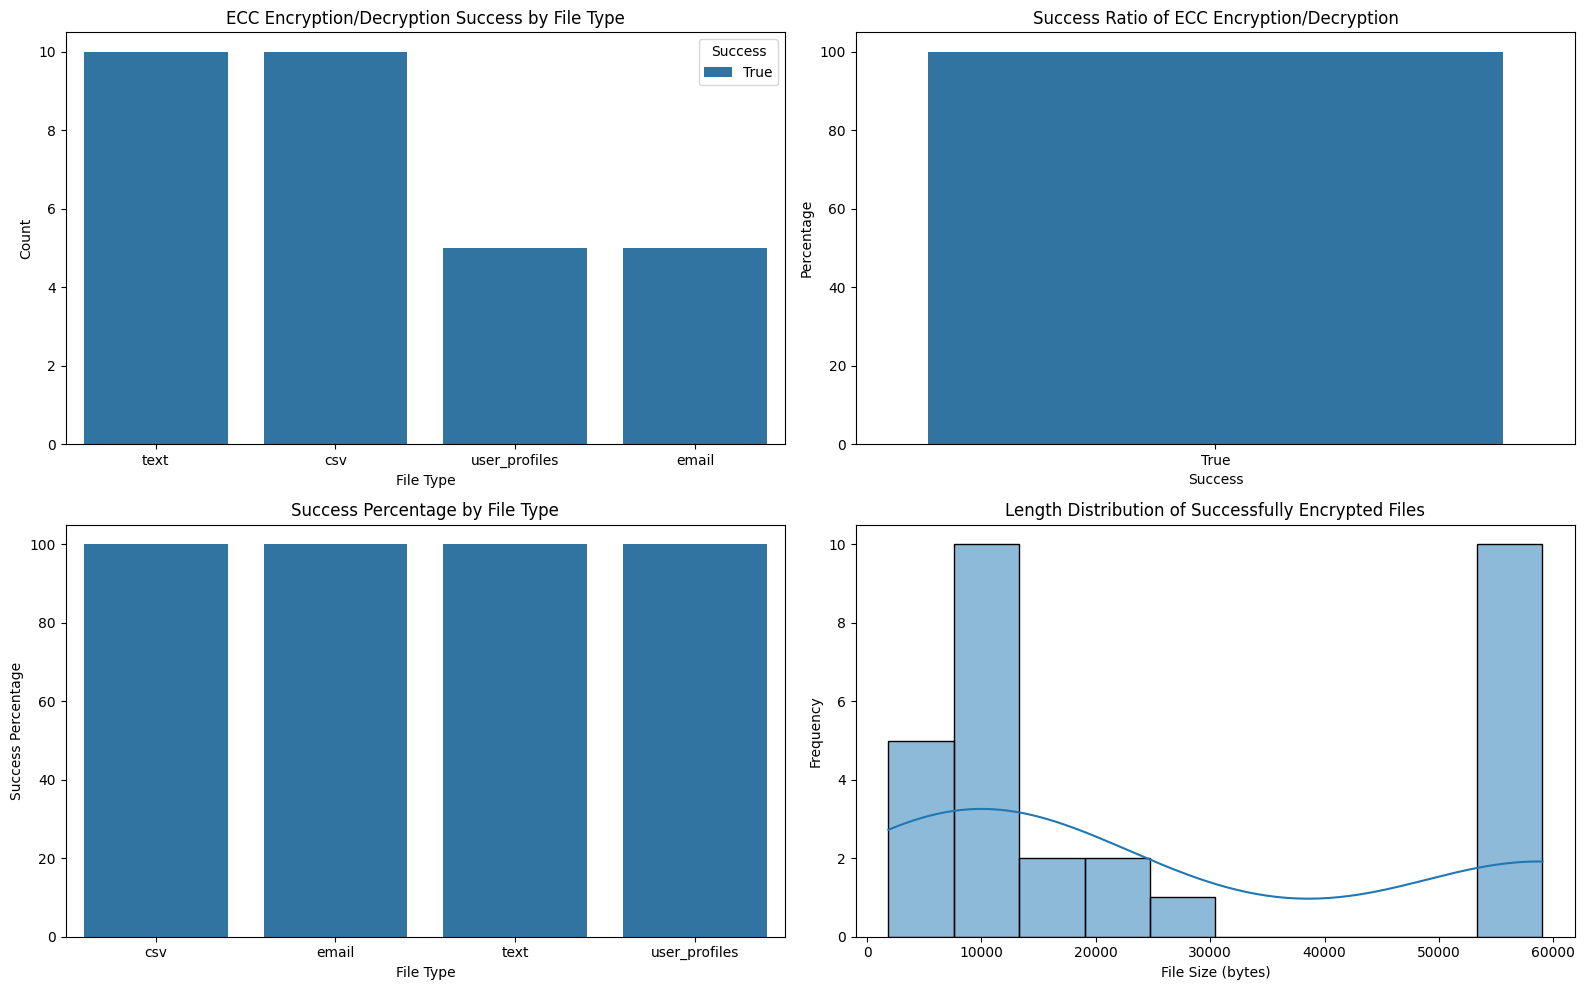

ECC encryption and decryption evaluation completed successfully.


In [29]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn faker pillow eciespy

import os
import pandas as pd
import numpy as np
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import base64

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/ecc_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to evaluate ECC encryption and decryption
def evaluate_ecc(data, pub_key, priv_key):
    encrypted_data = encrypt(pub_key, data)
    decrypted_data = decrypt(priv_key, encrypted_data)
    return data == decrypted_data

# Generate ECC keys
eth_key = generate_eth_key()
priv_key = eth_key.to_hex()
pub_key = eth_key.public_key.to_hex()

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate ECC on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_ecc(data, pub_key, priv_key)
    results.append({'file': f'text_file_{i}.txt', 'type': 'text', 'success': success})

# Evaluate ECC on generated CSV files
for i in range(10):
    file_path = os.path.join(data_path, f'csv_file_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_ecc(data, pub_key, priv_key)
    results.append({'file': f'csv_file_{i}.csv', 'type': 'csv', 'success': success})

# Evaluate ECC on generated user profiles
for i in range(5):
    file_path = os.path.join(data_path, f'user_profiles_{i}.csv')
    df = pd.read_csv(file_path)
    data = df.to_csv(index=False).encode('utf-8')
    success = evaluate_ecc(data, pub_key, priv_key)
    results.append({'file': f'user_profiles_{i}.csv', 'type': 'user_profiles', 'success': success})

# Evaluate ECC on generated email files
for i in range(5):
    file_path = os.path.join(data_path, f'emails_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()
    success = evaluate_ecc(data, pub_key, priv_key)
    results.append({'file': f'emails_{i}.txt', 'type': 'email', 'success': success})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'ecc_evaluation_results.csv'), index=False)

# Print results summary
print("ECC Evaluation Summary:")
print(df_results['success'].value_counts())

# Visualize the results
plt.figure(figsize=(16, 10))

# Success count plot
plt.subplot(2, 2, 1)
sns.countplot(data=df_results, x='type', hue='success')
plt.title('ECC Encryption/Decryption Success by File Type')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.legend(title='Success')

# Detailed success ratio
plt.subplot(2, 2, 2)
success_counts = df_results['success'].value_counts(normalize=True) * 100
sns.barplot(x=success_counts.index, y=success_counts.values)
plt.title('Success Ratio of ECC Encryption/Decryption')
plt.xlabel('Success')
plt.ylabel('Percentage')

# Success by file type
plt.subplot(2, 2, 3)
file_type_success = df_results.groupby('type')['success'].mean() * 100
sns.barplot(x=file_type_success.index, y=file_type_success.values)
plt.title('Success Percentage by File Type')
plt.xlabel('File Type')
plt.ylabel('Success Percentage')

# Distribution of lengths of successful encryptions
plt.subplot(2, 2, 4)
df_results['length'] = df_results['file'].apply(lambda x: os.path.getsize(os.path.join(data_path, x)))
sns.histplot(data=df_results[df_results['success']], x='length', bins=10, kde=True)
plt.title('Length Distribution of Successfully Encrypted Files')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("ECC encryption and decryption evaluation completed successfully.")


#Evaluation and Testing

Evaluation Summary:
algorithm
AES         1.0
Blowfish    1.0
ECC         1.0
RSA         1.0
Twofish     1.0
Name: success, dtype: float64


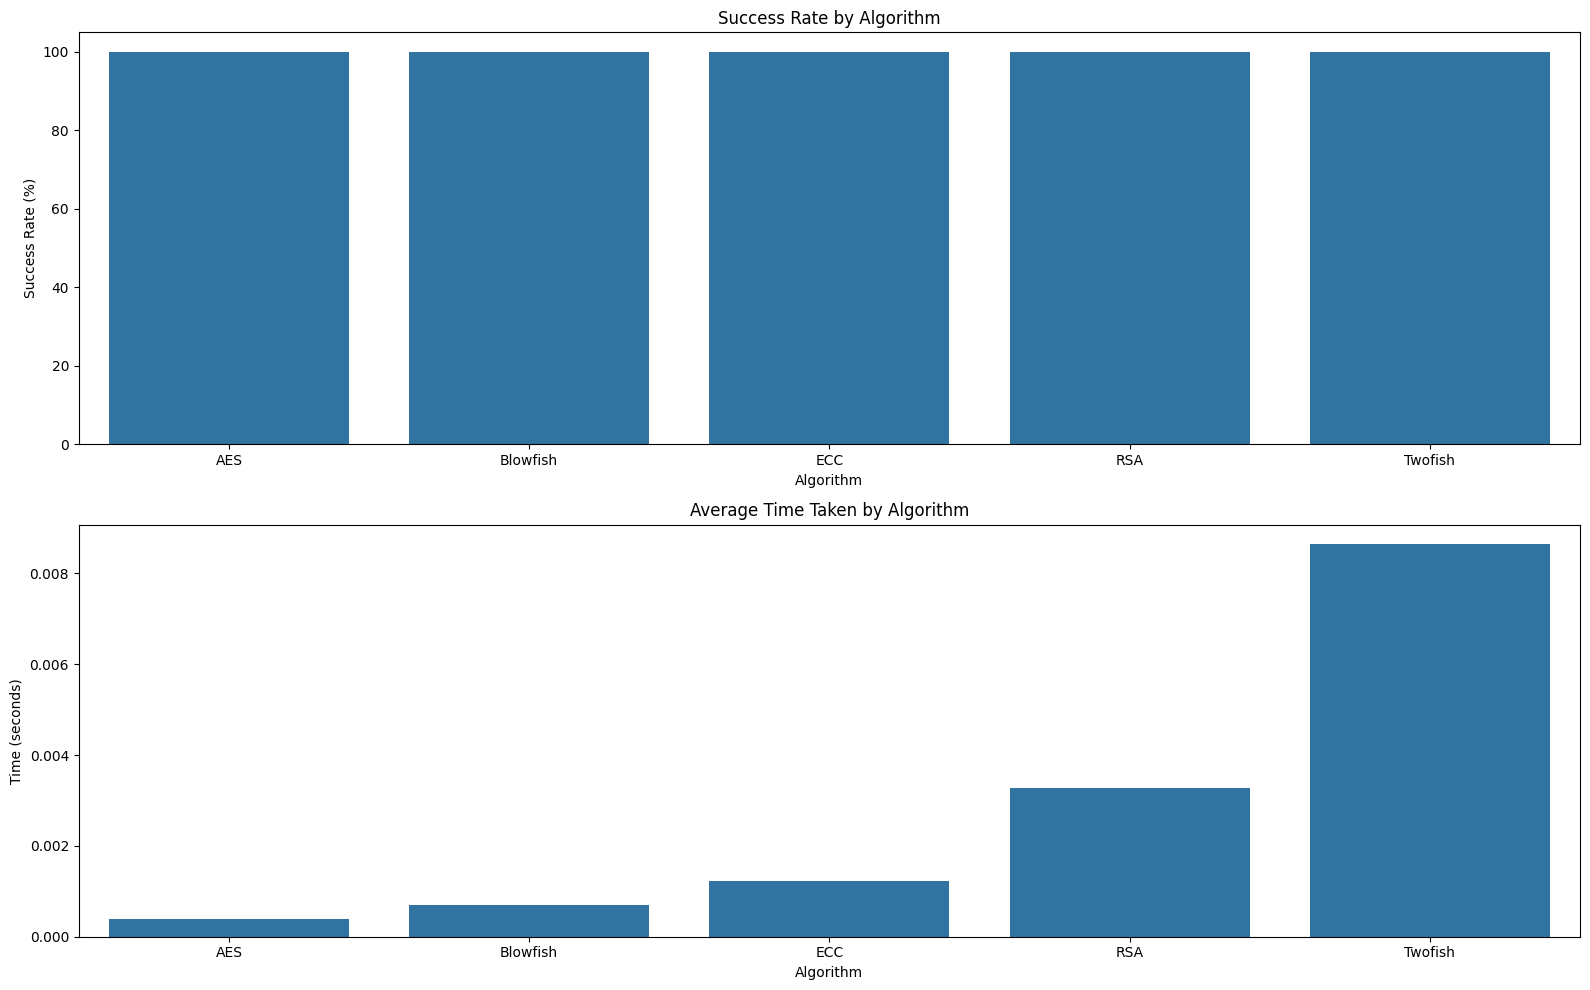

Evaluation of all algorithms completed successfully.


In [31]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn faker pillow pycryptodomex twofish eciespy

import os
import pandas as pd
import numpy as np
from Cryptodome.Cipher import AES, Blowfish
from Cryptodome.PublicKey import RSA
from Cryptodome.Cipher import PKCS1_OAEP
from Cryptodome.Random import get_random_bytes
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt
import twofish
from faker import Faker
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import time

# Directory for data and results
data_path = '/content/synthetic_data'
results_path = '/content/evaluation_results'
os.makedirs(data_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

fake = Faker()

# Function to generate text files
def generate_text_files(num_files, min_length, max_length):
    for i in range(num_files):
        file_length = fake.random_int(min_length, max_length)
        text = ' '.join(fake.text(max_nb_chars=200) for _ in range(file_length))
        with open(os.path.join(data_path, f'text_file_{i}.txt'), 'w') as f:
            f.write(text)

# Function to generate CSV files
def generate_csv_files(num_files, num_rows, num_columns):
    for i in range(num_files):
        data = {f'column_{j}': [fake.random_number(digits=5) for _ in range(num_rows)] for j in range(num_columns)}
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(data_path, f'csv_file_{i}.csv'), index=False)

# Function to generate user profiles
def generate_user_profiles(num_files, num_profiles):
    for i in range(num_files):
        profiles = [fake.profile(fields=['name', 'address', 'mail', 'birthdate']) for _ in range(num_profiles)]
        df = pd.DataFrame(profiles)
        df.to_csv(os.path.join(data_path, f'user_profiles_{i}.csv'), index=False)

# Function to generate email files
def generate_emails(num_files, min_length, max_length):
    for i in range(num_files):
        email_length = fake.random_int(min_length, max_length)
        emails = '\n\n'.join(fake.email() for _ in range(email_length))
        with open(os.path.join(data_path, f'emails_{i}.txt'), 'w') as f:
            f.write(emails)

# Function to pad data for AES, Blowfish, and Twofish
def pad(data, block_size):
    length = block_size - (len(data) % block_size)
    return data + bytes([length]) * length

# Function to unpad data for AES, Blowfish, and Twofish
def unpad(data):
    return data[:-data[-1]]

# Encryption and decryption functions for each algorithm

# AES
def encrypt_data_aes(data, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data, AES.block_size))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv, ct

def decrypt_data_aes(iv, ct, key):
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct))
    return pt

# RSA
def encrypt_key_rsa(aes_key, public_key):
    cipher_rsa = PKCS1_OAEP.new(public_key)
    encrypted_key = cipher_rsa.encrypt(aes_key)
    return encrypted_key

def decrypt_key_rsa(encrypted_key, private_key):
    cipher_rsa = PKCS1_OAEP.new(private_key)
    decrypted_key = cipher_rsa.decrypt(encrypted_key)
    return decrypted_key

# Blowfish
def encrypt_data_blowfish(data, key):
    cipher = Blowfish.new(key, Blowfish.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data, Blowfish.block_size))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv, ct

def decrypt_data_blowfish(iv, ct, key):
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = Blowfish.new(key, Blowfish.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct))
    return pt

# Twofish
def encrypt_data_twofish(data, key):
    cipher = twofish.Twofish(key)
    padded_data = pad(data, 16)
    encrypted_data = b""
    for i in range(0, len(padded_data), 16):
        encrypted_data += cipher.encrypt(padded_data[i:i + 16])
    return encrypted_data

def decrypt_data_twofish(encrypted_data, key):
    cipher = twofish.Twofish(key)
    decrypted_data = b""
    for i in range(0, len(encrypted_data), 16):
        decrypted_data += cipher.decrypt(encrypted_data[i:i + 16])
    return unpad(decrypted_data)

# ECC
def evaluate_ecc(data, pub_key, priv_key):
    encrypted_data = encrypt(pub_key, data)
    decrypted_data = decrypt(priv_key, encrypted_data)
    return data == decrypted_data

# Generate keys for each algorithm
aes_key = get_random_bytes(16)
rsa_key = RSA.generate(2048)
rsa_private_key = rsa_key
rsa_public_key = rsa_key.publickey()
blowfish_key = get_random_bytes(16)
twofish_key = get_random_bytes(16)
eth_key = generate_eth_key()
ecc_priv_key = eth_key.to_hex()
ecc_pub_key = eth_key.public_key.to_hex()

# Generate data
generate_text_files(10, 50, 200)
generate_csv_files(10, 1000, 10)
generate_user_profiles(5, 100)
generate_emails(5, 50, 200)

# Initialize results
results = []

# Evaluate each algorithm on generated text files
for i in range(10):
    file_path = os.path.join(data_path, f'text_file_{i}.txt')
    with open(file_path, 'rb') as f:
        data = f.read()

    # AES
    start_time = time.time()
    iv, encrypted_data = encrypt_data_aes(data, aes_key)
    decrypted_data = decrypt_data_aes(iv, encrypted_data, aes_key)
    aes_time = time.time() - start_time
    aes_success = data == decrypted_data
    results.append({'file': f'text_file_{i}.txt', 'algorithm': 'AES', 'success': aes_success, 'time': aes_time})

    # RSA (Encrypting AES key)
    start_time = time.time()
    encrypted_key = encrypt_key_rsa(aes_key, rsa_public_key)
    decrypted_key = decrypt_key_rsa(encrypted_key, rsa_private_key)
    iv, encrypted_data = encrypt_data_aes(data, decrypted_key)
    decrypted_data = decrypt_data_aes(iv, encrypted_data, decrypted_key)
    rsa_time = time.time() - start_time
    rsa_success = data == decrypted_data
    results.append({'file': f'text_file_{i}.txt', 'algorithm': 'RSA', 'success': rsa_success, 'time': rsa_time})

    # Blowfish
    start_time = time.time()
    iv, encrypted_data = encrypt_data_blowfish(data, blowfish_key)
    decrypted_data = decrypt_data_blowfish(iv, encrypted_data, blowfish_key)
    blowfish_time = time.time() - start_time
    blowfish_success = data == decrypted_data
    results.append({'file': f'text_file_{i}.txt', 'algorithm': 'Blowfish', 'success': blowfish_success, 'time': blowfish_time})

    # Twofish
    start_time = time.time()
    encrypted_data = encrypt_data_twofish(data, twofish_key)
    decrypted_data = decrypt_data_twofish(encrypted_data, twofish_key)
    twofish_time = time.time() - start_time
    twofish_success = data == decrypted_data
    results.append({'file': f'text_file_{i}.txt', 'algorithm': 'Twofish', 'success': twofish_success, 'time': twofish_time})

    # ECC
    start_time = time.time()
    ecc_success = evaluate_ecc(data, ecc_pub_key, ecc_priv_key)
    ecc_time = time.time() - start_time
    results.append({'file': f'text_file_{i}.txt', 'algorithm': 'ECC', 'success': ecc_success, 'time': ecc_time})

# Save results
df_results = pd.DataFrame(results)
df_results.to_csv(os.path.join(results_path, 'evaluation_results.csv'), index=False)

# Print results summary
print("Evaluation Summary:")
print(df_results.groupby('algorithm')['success'].mean())

# Visualize the results
plt.figure(figsize=(16, 10))

# Success rate by algorithm
plt.subplot(2, 1, 1)
success_rate = df_results.groupby('algorithm')['success'].mean() * 100
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.title('Success Rate by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')

# Average time taken by algorithm
plt.subplot(2, 1, 2)
avg_time = df_results.groupby('algorithm')['time'].mean()
sns.barplot(x=avg_time.index, y=avg_time.values)
plt.title('Average Time Taken by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

print("Evaluation of all algorithms completed successfully.")
